In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.Tensor([1,2]).cuda()

tensor([1., 2.], device='cuda:0')

In [4]:
linear1 = torch.nn.Linear(2,3)

In [5]:
linear1.weight

Parameter containing:
tensor([[ 0.1286, -0.2269],
        [-0.6700, -0.1472],
        [ 0.3308, -0.0948]], requires_grad=True)

In [24]:
import torch.nn.functional as F

In [25]:
class NN(torch.nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.linear1 = torch.nn.Linear(2,3)
        self.linear2 = torch.nn.Linear(3,3)
        self.linear3 = torch.nn.Linear(3,2)

    def forward(self,x):
        h1 = self.linear1(x)
        a1 = F.relu(h1)

        h2 = self.linear2(a1)
        a2 = F.relu(h2)

        h3 = self.linear3(a2)
        return h3

nn = NN()
print(nn)

NN(
  (linear1): Linear(in_features=2, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=2, bias=True)
)


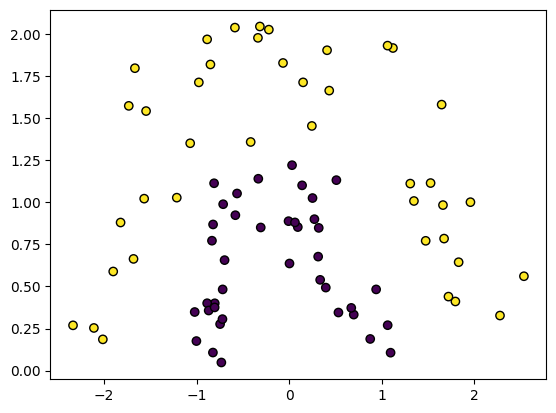

In [28]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(2).repeat(40) #กำหนดให้มี 2 สีจำนวนสีละ 40 จุด
r = np.random.normal(z+1,0.25) #กำหนดรัศมีให้ห่างกันในแต่ละสี
t = np.random.uniform(0,np.pi,80) #สุ่มค่าตั้งแต่ 0 ถึงค่า pi
x = r*np.cos(t)
y = r*np.sin(t)
X = np.array([x,y]).T
plt.scatter(x,y,c=z,edgecolor='k')
plt.show()

In [27]:
optim = torch.optim.Adam(nn.parameters(),lr=0.1)
loss = torch.nn.CrossEntropyLoss()

In [29]:
X = torch.Tensor(X)
z = torch.LongTensor(z)

In [31]:
for i in range(200):
    a = nn(X)
    output = loss(a,z)
    output.backward()

    optim.step()
    optim.zero_grad()

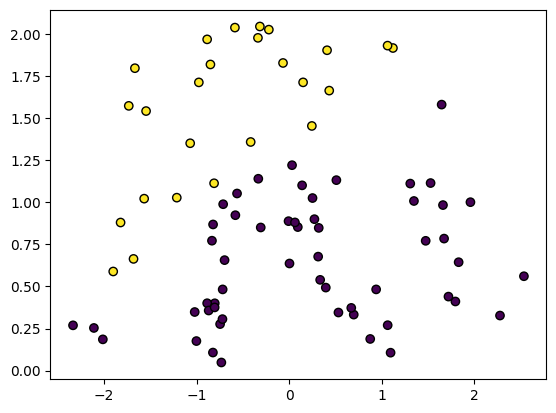

In [34]:
predict = nn(X).argmax(1)

plt.scatter(x,y,c=predict,edgecolor='k')
plt.show()